# Stock price prediction using Keras & Recurrent Neural      Network


In [1]:
#Importing all important libraries.
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#imports for reading stock data from yahoo
import pandas_datareader as pdr

In [4]:
#for timestamp 
from datetime import datetime

For training our model we will extract stock data of Apple company from 2014 to 2018.

In [5]:
start_date = datetime(2014, 1, 1)
end_date = datetime(2018, 12, 31)

In [6]:
train_data = pdr.data.get_data_yahoo('AAPL',start_date,end_date)

In [7]:
train_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,80.182854,79.142860,79.167145,80.145714,55771100.0,72.121513
2014-01-02,79.575714,78.860001,79.382858,79.018570,58671200.0,71.107201
2014-01-03,79.099998,77.204285,78.980003,77.282860,98116900.0,69.545288
2014-01-06,78.114288,76.228569,76.778572,77.704285,103152700.0,69.924515
2014-01-07,77.994286,76.845711,77.760002,77.148575,79302300.0,69.424438


In [8]:
train_data.drop(train_data.index[0],inplace=True)

In [9]:
train_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,79.575714,78.860001,79.382858,79.018570,58671200.0,71.107201
2014-01-03,79.099998,77.204285,78.980003,77.282860,98116900.0,69.545288
2014-01-06,78.114288,76.228569,76.778572,77.704285,103152700.0,69.924515
2014-01-07,77.994286,76.845711,77.760002,77.148575,79302300.0,69.424438
2014-01-08,77.937141,76.955711,76.972855,77.637146,64632400.0,69.864105


In [10]:
train_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,144.656540
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,154.843475
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,153.838562
2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,153.917389
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,155.405045


For testing the model we will extract stock data of Apple for the first month of 2019.

In [11]:
start = datetime(2019,1,1)
end = datetime(2019,1,31)

In [12]:
test_data = pdr.data.get_data_yahoo('AAPL',start,end)

In [13]:
test_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500,155.405045
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700,155.582367
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200,140.085220
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100,146.065353
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800,145.740265


In [14]:
test_data.drop(test_data.index[0],inplace=True)

In [15]:
test_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700,155.582367
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200,140.085220
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100,146.065353
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800,145.740265
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300,148.518509


In [16]:
test_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-25,158.130005,154.320007,155.479996,157.759995,33535500,155.424744
2019-01-28,156.330002,153.660004,155.789993,156.300003,26192100,153.986359
2019-01-29,158.130005,154.110001,156.250000,154.679993,41587200,152.390320
2019-01-30,166.149994,160.229996,163.250000,165.250000,61109800,162.803864
2019-01-31,169.000000,164.559998,166.110001,166.440002,40739600,163.976242


Extracting the stocks close data. 

In [17]:
train_set = train_data.iloc[:,3:4].values

In [18]:
train_set

array([[ 79.01856995],
       [ 77.2828598 ],
       [ 77.70428467],
       ...,
       [156.1499939 ],
       [156.22999573],
       [157.74000549]])

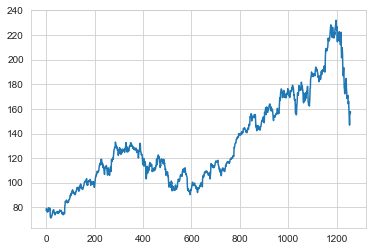

In [19]:
plt.plot(train_set)
plt.show()

Applying feature scaling.

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler(feature_range= (0,1))
train_set_scaled = scaler.fit_transform(train_set)

In [22]:
train_set_scaled

array([[0.04743445],
       [0.03663169],
       [0.03925457],
       ...,
       [0.52748703],
       [0.52798495],
       [0.53738299]])

Creating a data structure with 60 timesteps and 1 output.

In [23]:
X_train = []
y_train = []

In [24]:
for i in range(60, len(train_set_scaled)):
    X_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])

In [25]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [26]:
X_train

array([[0.04743445, 0.03663169, 0.03925457, ..., 0.03556473, 0.03350197,
        0.03296849],
       [0.03663169, 0.03925457, 0.03579593, ..., 0.03350197, 0.03296849,
        0.03286179],
       [0.03925457, 0.03579593, 0.03883671, ..., 0.03296849, 0.03286179,
        0.03722738],
       ...,
       [0.97006332, 0.98263547, 1.        , ..., 0.4937539 , 0.46948102,
        0.53383536],
       [0.98263547, 1.        , 0.97460678, ..., 0.46948102, 0.53383536,
        0.52748703],
       [1.        , 0.97460678, 0.95157854, ..., 0.53383536, 0.52748703,
        0.52798495]])

In [27]:
X_train.shape

(1198, 60)

Reshaping the X_train to make it suitable for Keras.

In [28]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [29]:
X_train.shape

(1198, 60, 1)

Building the RNN model.

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

Using TensorFlow backend.


Intialising the RNN model.

In [31]:
regressor = Sequential()

Adding first LSTM layer and some Dropout for regularization.

In [32]:
regressor.add(LSTM(units=50, return_sequences= True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.3))

Adding second LSTM layer and some Dropout for regularization.

In [33]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

Adding third LSTM layer and some Dropout for regularization.

In [34]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

Adding fourth LSTM layer and some Dropout for regularization.

In [35]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

Adding the output layers.

In [36]:
regressor.add(Dense(units=1))

Compiling the model.

In [37]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0295
Epoch 2/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0056
Epoch 3/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0062
Epoch 4/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0061
Epoch 5/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0040
Epoch 10/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0039
Epoch 12/100
1198/1198 [==============================] - 10s 

Making prediction for the january month of 2019.

In [39]:
real_data = test_data.iloc[:,3:4].values

Reshaping and applying normalization on the test data. Similarly, like we did for our train data.

In [40]:
dataset_total = pd.concat((train_data['Close'], test_data['Close']), axis=0)

In [41]:
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values

In [42]:
inputs = inputs.reshape(-1,1)

In [43]:
inputs = scaler.transform(inputs)

In [44]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])

In [45]:
X_test = np.array(X_test)

In [46]:
X_test.shape

(20, 60)

In [47]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [48]:
X_test.shape

(20, 60, 1)

In [49]:
predicted_stock = regressor.predict(X_test)

In [50]:
predicted_stock

array([[0.52875876],
       [0.54000366],
       [0.5378952 ],
       [0.5251515 ],
       [0.508511  ],
       [0.495705  ],
       [0.49172395],
       [0.4962862 ],
       [0.50450623],
       [0.5103956 ],
       [0.51392865],
       [0.51719534],
       [0.5214095 ],
       [0.52675194],
       [0.5295696 ],
       [0.5291672 ],
       [0.5257342 ],
       [0.5244502 ],
       [0.52604085],
       [0.5281842 ]], dtype=float32)

In [51]:
predicted_stock = scaler.inverse_transform(predicted_stock)

In [52]:
predicted_stock

array([[156.35432],
       [158.16109],
       [157.82231],
       [155.77473],
       [153.10106],
       [151.04349],
       [150.40384],
       [151.13687],
       [152.45761],
       [153.40387],
       [153.97153],
       [154.4964 ],
       [155.17351],
       [156.03189],
       [156.48462],
       [156.41995],
       [155.86836],
       [155.66206],
       [155.91763],
       [156.26201]], dtype=float32)

Visualising the results.

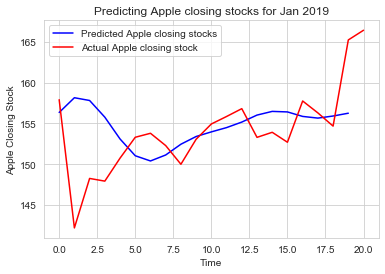

In [53]:
plt.plot(predicted_stock, color = 'Blue', label='Predicted Apple closing stocks')
plt.plot(real_data, color='red', label='Actual Apple closing stock')
plt.title('Predicting Apple closing stocks for Jan 2019')
plt.xlabel('Time')
plt.ylabel('Apple Closing Stock')
plt.legend()
plt.show()
